# Deep Learning Assignment
* A01746138 | Luis Fernando Sánchez Spínola
* A00819152 | Franco Castañon Guerrero
* A01746119 | César Alejandro Rodríguez Montoya

In [ ]:
!pip install keras_tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


In [ ]:
pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 13.3 MB/s eta 0:00:00


In [ ]:
import random
import keras
import numpy as np
# import visualkeras
import seaborn as sns
import tensorflow as tf
# from PIL import ImageFont
# import keras_tuner as kt
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float') / 255.
x_test = x_test.astype('float') / 255.
category = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
          'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
print('CIFAR-10 Dataset Shape:')
print('X_train: ' + str(x_train.shape))
print('Y_train: ' + str(y_train.shape))
print('X_test:  '  + str(x_test.shape))
print('Y_test:  '  + str(y_test.shape))

170498071/170498071 [==============================] - 21s 0us/step
CIFAR-10 Dataset Shape:
X_train: (50000, 32, 32, 3)
Y_train: (50000, 1)
X_test:  (10000, 32, 32, 3)
Y_test:  (10000, 1)


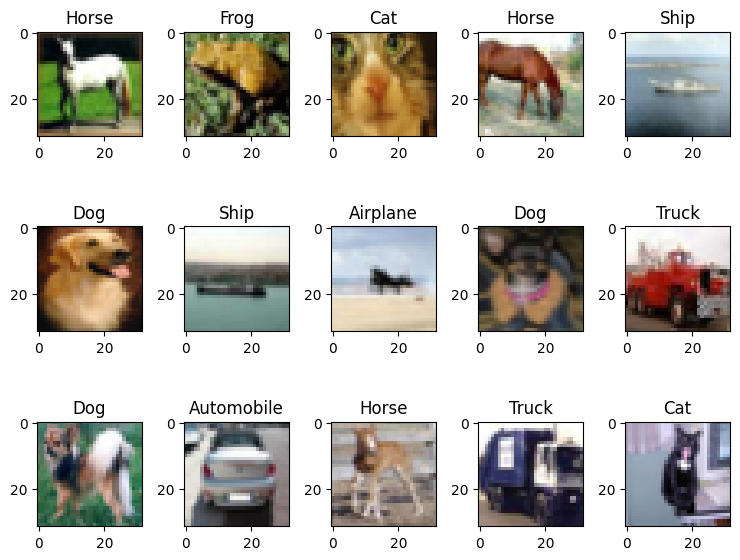

In [ ]:
#rows and columns  to see
num_row = 3
num_col = 5

#segment of the dataset
num = num_row*num_col
indexes = random.sample(range(x_train.shape[0]), k=num)
images = x_train[indexes]
labels = y_train[indexes]

# plot
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title(category[labels[i][0]])
plt.tight_layout()
plt.show()

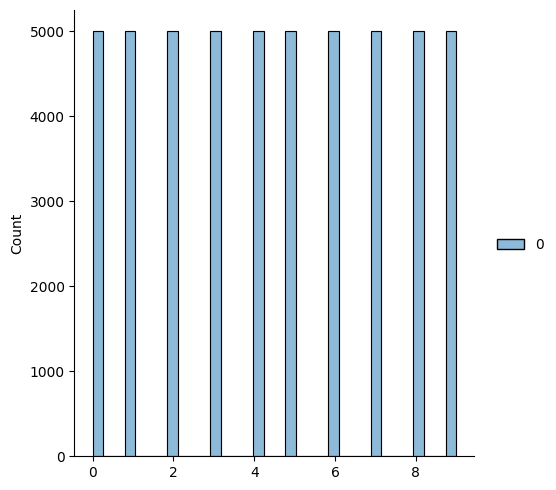

In [ ]:
sns.displot(y_train)

## Baseline model

In [ ]:
def model():
  m = models.Sequential()
  m.add(layers.Input(shape=(32, 32, 3), name='Input'))
  m.add(layers.Conv2D(filters=32,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional'))
  m.add(layers.MaxPooling2D(pool_size=(2, 2),
                            name='MaxPooling'))
  m.add(layers.Flatten(name='Flatten'))
  m.add(layers.Dense(units=128, activation='relu', name='Dense'))
  m.add(layers.Dense(units=10, activation='softmax', name='Output'))

  m.compile(optimizer=tf.keras.optimizers.Adam(0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return m

In [ ]:
model = model()
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 3s 6ms/step - loss: 1.5929 - sparse_categorical_accuracy: 0.4340 - val_loss: 1.3565 - val_sparse_categorical_accuracy: 0.5148
Epoch 2/50
391/391 [==============================] - 2s 6ms/step - loss: 1.2749 - sparse_categorical_accuracy: 0.5530 - val_loss: 1.2268 - val_sparse_categorical_accuracy: 0.5699
Epoch 3/50
391/391 [==============================] - 3s 7ms/step - loss: 1.1619 - sparse_categorical_accuracy: 0.5923 - val_loss: 1.1540 - val_sparse_categorical_accuracy: 0.5977
Epoch 4/50
391/391 [==============================] - 2s 5ms/step - loss: 1.0805 - sparse_categorical_accuracy: 0.6259 - val_loss: 1.1637 - val_sparse_categorical_accuracy: 0.5853
Epoch 5/50
391/391 [==============================] - 2s 6ms/step - loss: 1.0174 - sparse_categorical_accuracy: 0.6491 - val_loss: 1.0731 - val_sparse_categorical_accuracy: 0.6236
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.9650 - sparse_categorica

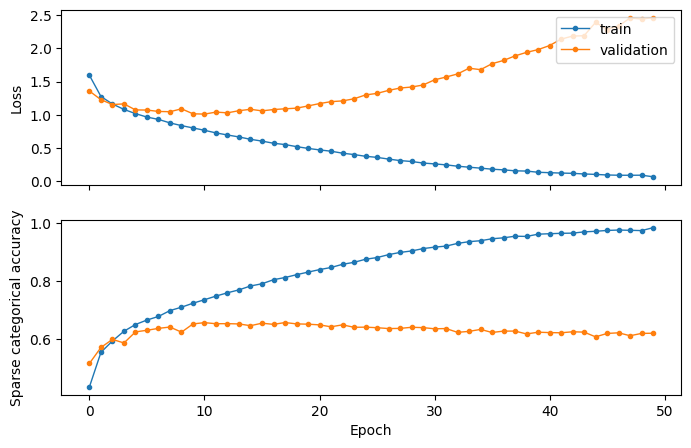

In [ ]:
_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['sparse_categorical_accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_sparse_categorical_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Sparse categorical accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

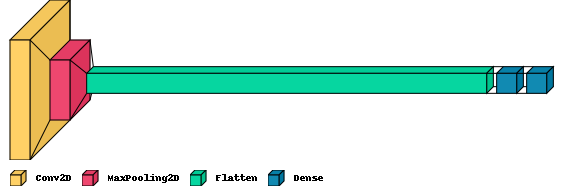

In [ ]:
visualkeras.layered_view(model, legend=True)

1/1 [==============================] - 0s 77ms/step


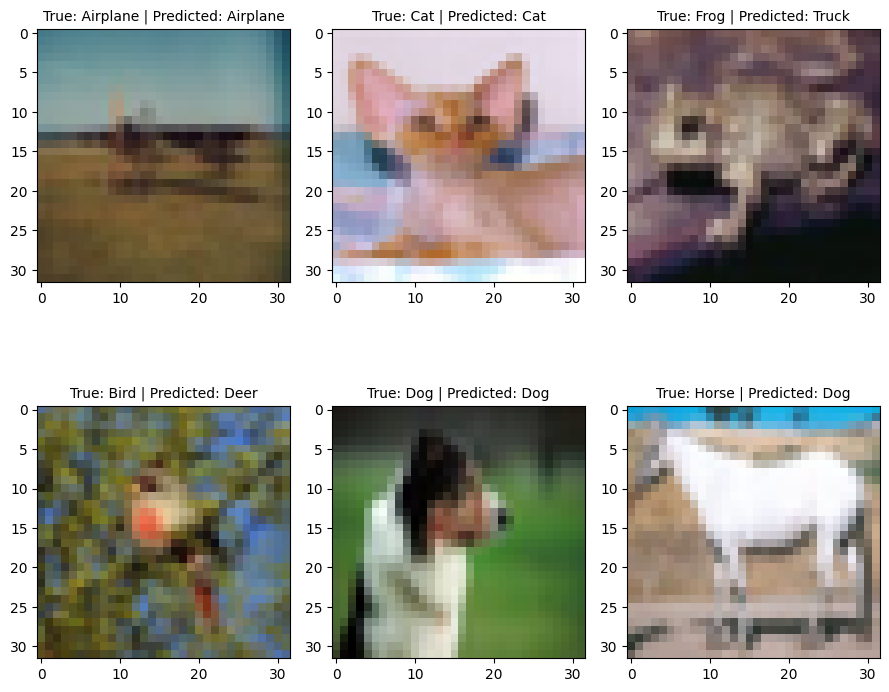

In [ ]:
#rows and columns  to see
num_row = 2
num_col = 3

#segment of the dataset
indexes = random.sample(range(x_test.shape[0]), k=num)
images = x_test[indexes]
labels = y_test[indexes]
predicted = [np.argmax(m) for m in model.predict(images)]

# plot
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,4*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title(f'True: {category[labels[i][0]]} | Predicted: {category[predicted[i]]}', fontsize=10)
plt.tight_layout()
plt.show()

## Changing architecture

### First attempt

In [ ]:
def model():
  m = models.Sequential()
  m.add(layers.Input(shape=(32, 32, 3), name='Input'))
  m.add(layers.Conv2D(filters=32,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional01'))
  m.add(layers.Conv2D(filters=64,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional02'))
  m.add(layers.Conv2D(filters=128,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional03'))
  m.add(layers.MaxPooling2D(pool_size=(2, 2),
                            name='MaxPooling01'))
  m.add(layers.Dropout(rate=0.25, name='Dropout01'))
  m.add(layers.Conv2D(filters=128,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional04'))
  m.add(layers.Conv2D(filters=64,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional05'))
  m.add(layers.Conv2D(filters=32,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional06'))
  m.add(layers.MaxPooling2D(pool_size=(2, 2),
                            name='MaxPooling02'))
  m.add(layers.Dropout(rate=0.25, name='Dropout02'))
  m.add(layers.Flatten(name='Flatten'))
  m.add(layers.Dense(units=256, activation='sigmoid', name='Dense01'))
  m.add(layers.Dense(units=128, activation='sigmoid', name='Dense02'))
  m.add(layers.Dense(units=10, activation='softmax', name='Output'))

  m.compile(optimizer=tf.keras.optimizers.Adam(0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return m

In [ ]:
model = model()
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 19s 35ms/step - loss: 1.9281 - sparse_categorical_accuracy: 0.2809 - val_loss: 1.6252 - val_sparse_categorical_accuracy: 0.3978
Epoch 2/50
391/391 [==============================] - 13s 32ms/step - loss: 1.5273 - sparse_categorical_accuracy: 0.4404 - val_loss: 1.3813 - val_sparse_categorical_accuracy: 0.4947
Epoch 3/50
391/391 [==============================] - 12s 32ms/step - loss: 1.3467 - sparse_categorical_accuracy: 0.5139 - val_loss: 1.2248 - val_sparse_categorical_accuracy: 0.5542
Epoch 4/50
391/391 [==============================] - 11s 29ms/step - loss: 1.2099 - sparse_categorical_accuracy: 0.5640 - val_loss: 1.1182 - val_sparse_categorical_accuracy: 0.5998
Epoch 5/50
391/391 [==============================] - 11s 29ms/step - loss: 1.1277 - sparse_categorical_accuracy: 0.5980 - val_loss: 1.1632 - val_sparse_categorical_accuracy: 0.5925
Epoch 6/50
391/391 [==============================] - 11s 29ms/step - loss: 1.0509 - spars

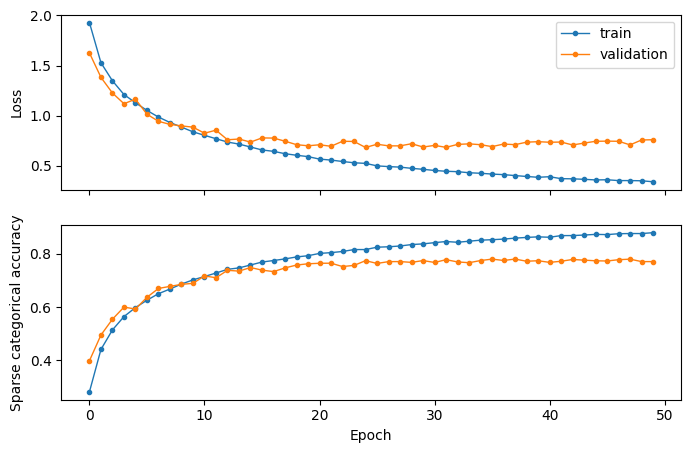

In [ ]:
_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['sparse_categorical_accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_sparse_categorical_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Sparse categorical accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

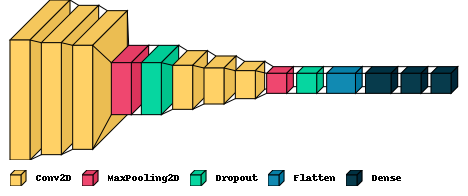

In [ ]:
visualkeras.layered_view(model, legend=True)

1/1 [==============================] - 0s 438ms/step


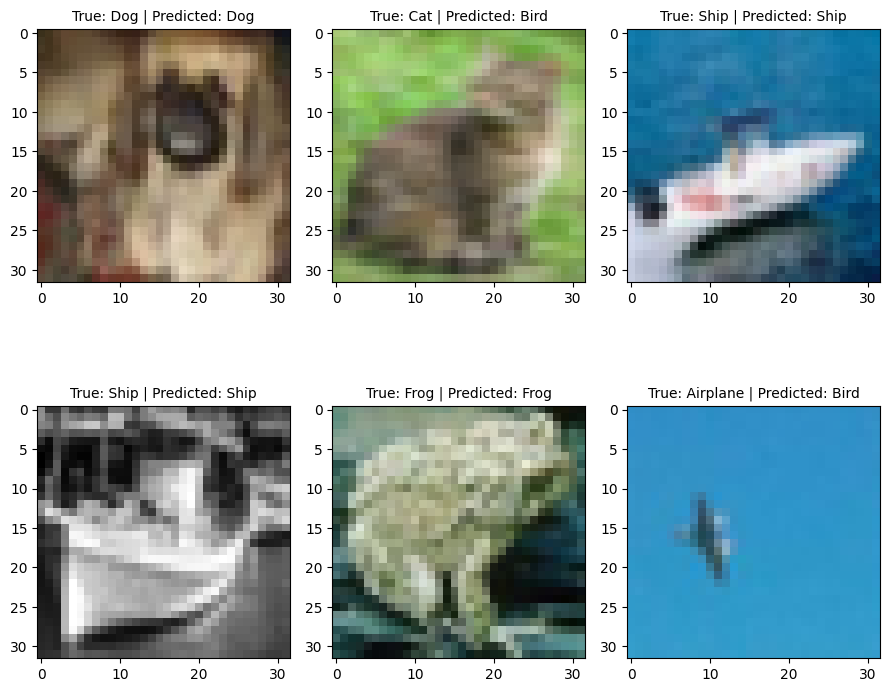

In [ ]:
#rows and columns  to see
num_row = 2
num_col = 3

#segment of the dataset
num = num_row*num_col
indexes = random.sample(range(x_test.shape[0]), k=num)
images = x_test[indexes]
labels = y_test[indexes]
predicted = [np.argmax(m) for m in model.predict(images)]

# plot
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,4*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title(f'True: {category[labels[i][0]]} | Predicted: {category[predicted[i]]}', fontsize=10)
plt.tight_layout()
plt.show()

### Second attempt

In [ ]:
def model():
  m = models.Sequential()
  m.add(layers.Input(shape=(32, 32, 3), name='Input'))
  m.add(layers.Conv2D(filters=512,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional01',))
  m.add(layers.Conv2D(filters=256,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional02'))
  m.add(layers.Conv2D(filters=128,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional03'))
  m.add(layers.MaxPooling2D(pool_size=(2, 2),
                            name='MaxPooling01'))
  m.add(layers.Dropout(rate=0.4, name='Dropout01'))
  m.add(layers.Conv2D(filters=128,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional04'))
  m.add(layers.Conv2D(filters=256,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional05'))
  m.add(layers.Conv2D(filters=512,
                      activation='relu',
                      kernel_size=(3, 3),
                      name='Convolutional06'))
  m.add(layers.Dropout(rate=0.4, name='Dropout02'))
  m.add(layers.Flatten(name='Flatten'))
  m.add(layers.Dense(units=512, activation='sigmoid', name='Dense01'))
  m.add(layers.Dense(units=256, activation='elu', name='Dense02'))
  m.add(layers.Dense(units=256, activation='sigmoid', name='Dense03'))
  m.add(layers.Dense(units=10, activation='softmax', name='Output'))

  m.compile(optimizer=tf.keras.optimizers.Adam(0.001),
            loss=tf.keras.losses.SparseCategoricalCrossentropy(),
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return m

In [ ]:
model = model()
history = model.fit(x=x_train, y=y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
391/391 [==============================] - 29s 66ms/step - loss: 1.8279 - sparse_categorical_accuracy: 0.3150 - val_loss: 1.5106 - val_sparse_categorical_accuracy: 0.4424
Epoch 2/50
391/391 [==============================] - 18s 47ms/step - loss: 1.3652 - sparse_categorical_accuracy: 0.5025 - val_loss: 1.2364 - val_sparse_categorical_accuracy: 0.5569
Epoch 3/50
391/391 [==============================] - 20s 52ms/step - loss: 1.1389 - sparse_categorical_accuracy: 0.5916 - val_loss: 1.0695 - val_sparse_categorical_accuracy: 0.6215
Epoch 4/50
391/391 [==============================] - 21s 54ms/step - loss: 0.9838 - sparse_categorical_accuracy: 0.6488 - val_loss: 0.9138 - val_sparse_categorical_accuracy: 0.6764
Epoch 5/50
391/391 [==============================] - 18s 46ms/step - loss: 0.8592 - sparse_categorical_accuracy: 0.6948 - val_loss: 0.8393 - val_sparse_categorical_accuracy: 0.7030
Epoch 6/50
391/391 [==============================] - 19s 48ms/step - loss: 0.7630 - spars

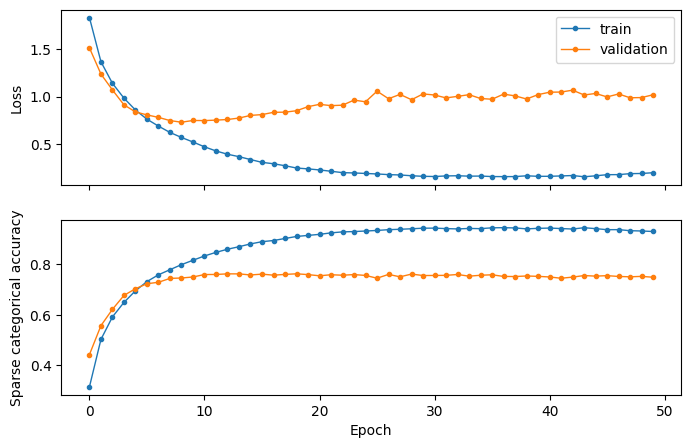

In [ ]:
_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['sparse_categorical_accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_sparse_categorical_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Sparse categorical accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

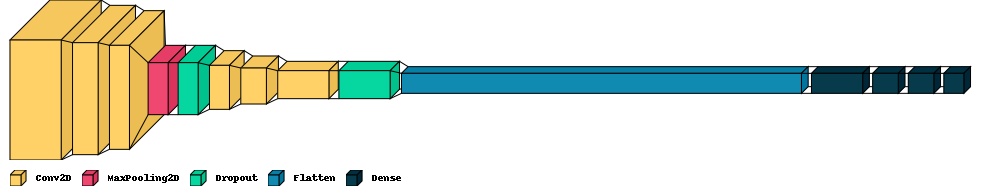

In [ ]:
model = model()
visualkeras.layered_view(model, legend=True)

1/1 [==============================] - 0s 38ms/step


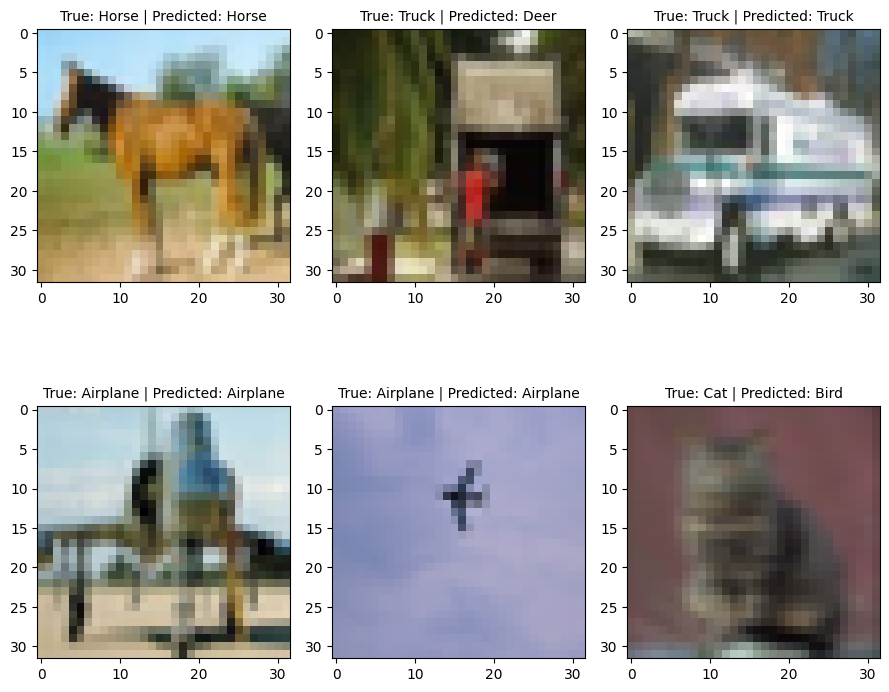

In [ ]:
#rows and columns  to see
num_row = 2
num_col = 3

#segment of the dataset
num = num_row*num_col
indexes = random.sample(range(x_test.shape[0]), k=num)
images = x_test[indexes]
labels = y_test[indexes]
predicted = [np.argmax(m) for m in model.predict(images)]

# plot
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,4*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title(f'True: {category[labels[i][0]]} | Predicted: {category[predicted[i]]}', fontsize=10)
plt.tight_layout()
plt.show()

## Hyperparameter tuning

### Data reduction

In [ ]:
reduced_x_train = []
reduced_y_train = []
num_elements = 500  # Number of elements per class
c0, c1, c2, c3, c4, c5, c6, c7, c8, c9, index = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
for item in y_train:
  if item == 0 and c0<num_elements:
    c0 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 1 and c1<num_elements:
    c1 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 2 and c2<num_elements:
    c2 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 3 and c3<num_elements:
    c3 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 4 and c4<num_elements:
    c4 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 5 and c5<num_elements:
    c5 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 6 and c6<num_elements:
    c6 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 7 and c7<num_elements:
    c7 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 8 and c8<num_elements:
    c8 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif item == 9 and c9<num_elements:
    c9 += 1
    reduced_x_train.append(x_train[index])
    reduced_y_train.append(y_train[index])
  elif [c0, c1, c2, c3, c4, c5, c6, c7, c8, c9] == [num_elements] * 10:
    # print(index)
    break
  index +=1

reduced_x_train = np.array(reduced_x_train)
reduced_y_train = np.array(reduced_y_train)

print('reduced_x_train: ' + str(reduced_x_train.shape))
print('reduced_y_train: ' + str(reduced_y_train.size))

reduced_x_train: (5000, 32, 32, 3)
reduced_y_train: 5000


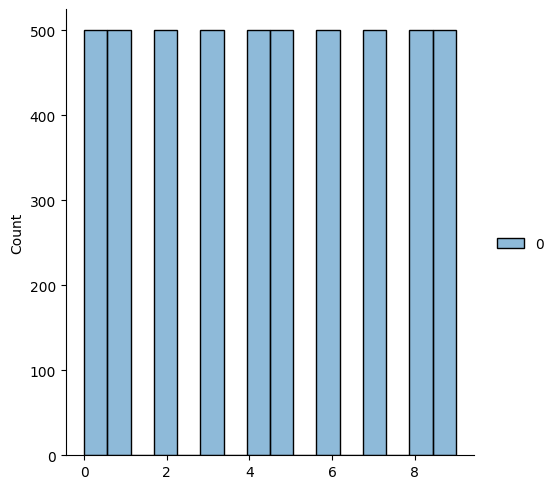

In [ ]:
sns.displot(reduced_y_train)

### Keras tuner

In [ ]:
def createModel(hp):

  model = models.Sequential()
  model.add(layers.Input(shape=(32, 32, 3), name='Input'))

  # Tune the number of layers per group
  for i in range(1, hp.Choice('num_groups', [2, 3]) + 1, 1): # Number of groups in the NN

    for j in range(1, hp.Choice(f'num_layers_G{i}', [3, 4, 5]) + 1, 1): # Number of layers per group

      model.add(
            layers.Conv2D(
                filters=hp.Choice(name=f"filters_G{i}_L{j}", values=[16, 32, 64, 128]),
                activation='relu',
                name=f'G{i}_L{j}',
                padding='same',
                kernel_size=(3, 3)
            )
        )

    model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', name=f'MaxPooling{i}'))
    model.add(layers.Dropout(rate=0.4, name=f'Dropout{i}'))

  model.add(layers.Flatten(name='Flatten'))
  model.add(layers.Dense(units=hp.Choice(name=f"FC", values=[16, 32, 64, 128]), activation='sigmoid', name='FC'))
  model.add(layers.Dropout(rate=0.4, name=f'Dropout{i+1}'))
  model.add(layers.Dense(10, activation='softmax', name='Output'))

  model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp.Float("lr", min_value=1e-4, max_value=1e-3, sampling="log")),
                loss='sparse_categorical_crossentropy', metrics=['accuracy'])

  return model

In [ ]:
tuner = kt.BayesianOptimization(
    hypermodel=createModel,
    objective="accuracy",
    max_trials=8, # Number of trials
    executions_per_trial=1, # Number of NN to run
    overwrite=True,
    project_name="Final project"
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 11
num_groups (Choice)
{'default': 2, 'conditions': [], 'values': [2, 3], 'ordered': True}
num_layers_G1 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 4, 5], 'ordered': True}
filters_G1_L1 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
filters_G1_L2 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
filters_G1_L3 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
num_layers_G2 (Choice)
{'default': 3, 'conditions': [], 'values': [3, 4, 5], 'ordered': True}
filters_G2_L1 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
filters_G2_L2 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
filters_G2_L3 (Choice)
{'default': 16, 'conditions': [], 'values': [16, 32, 64, 128], 'ordered': True}
FC (Choice)
{'default': 16, 'conditions': [], 'values':

In [ ]:
tuner.search(reduced_x_train, reduced_y_train, epochs=100, validation_data=(x_test, y_test), batch_size=32)

Trial 8 Complete [00h 07m 33s]
accuracy: 0.6972000002861023

Best accuracy So Far: 0.871399998664856
Total elapsed time: 00h 50m 19s


In [ ]:
models = tuner.get_best_models(num_models=2)
best_model = models[0]

In [ ]:
tuner.results_summary()

Results summary
Results in ./Final project
Showing 10 best trials
Objective(name="accuracy", direction="max")

Trial 2 summary
Hyperparameters:
num_groups: 2
num_layers_G1: 4
filters_G1_L1: 16
filters_G1_L2: 16
filters_G1_L3: 16
num_layers_G2: 3
filters_G2_L1: 16
filters_G2_L2: 16
filters_G2_L3: 128
FC: 32
lr: 0.00029007655236787405
filters_G1_L4: 128
num_layers_G3: 4
filters_G3_L1: 16
filters_G3_L2: 128
filters_G3_L3: 128
filters_G1_L5: 64
filters_G2_L4: 16
filters_G2_L5: 128
filters_G3_L4: 16
Score: 0.871399998664856

Trial 6 summary
Hyperparameters:
num_groups: 2
num_layers_G1: 4
filters_G1_L1: 16
filters_G1_L2: 64
filters_G1_L3: 32
num_layers_G2: 4
filters_G2_L1: 64
filters_G2_L2: 32
filters_G2_L3: 128
FC: 32
lr: 0.0001864677984257327
filters_G1_L4: 64
num_layers_G3: 5
filters_G3_L1: 16
filters_G3_L2: 128
filters_G3_L3: 32
filters_G1_L5: 32
filters_G2_L4: 128
filters_G2_L5: 16
filters_G3_L4: 16
filters_G3_L5: 128
Score: 0.8650000095367432

Trial 7 summary
Hyperparameters:
num_group

In [ ]:
best_model.build(input_shape=(None, 28, 28, 3))
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 G1_L1 (Conv2D)              (None, 32, 32, 16)        448       
                                                                 
 G1_L2 (Conv2D)              (None, 32, 32, 16)        2320      
                                                                 
 G1_L3 (Conv2D)              (None, 32, 32, 16)        2320      
                                                                 
 G1_L4 (Conv2D)              (None, 32, 32, 128)       18560     
                                                                 
 MaxPooling1 (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 Dropout1 (Dropout)          (None, 16, 16, 128)       0         
                                                                 
 G2_L1 (Conv2D)              (None, 16, 16, 16)        1

### Best model

In [ ]:
model = models.Sequential()
model.add(layers.Input(shape=(32, 32, 3), name='Input'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', name='G1_L1'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', name='G1_L2'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', name='G1_L3'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name='G1_L4'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', name='MaxPooling1'))
model.add(layers.Dropout(rate=0.25, name='Dropout1'))

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', name='G2_L1'))
model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same', name='G2_L2'))
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same', name='G2_L3'))

model.add(layers.MaxPooling2D(pool_size=(2, 2), padding='same', name='MaxPooling2'))
model.add(layers.Dropout(rate=0.25, name='Dropout2'))
model.add(layers.Flatten(name='Flatten'))

model.add(layers.Dense(units=32, activation='relu', name='FC'))
model.add(layers.Dropout(rate=0.25, name='Dropout3'))
model.add(layers.Dense(10, activation='softmax', name='Output'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
print (model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 G1_L1 (Conv2D)              (None, 32, 32, 16)        448       
                                                                 
 G1_L2 (Conv2D)              (None, 32, 32, 16)        2320      
                                                                 
 G1_L3 (Conv2D)              (None, 32, 32, 16)        2320      
                                                                 
 G1_L4 (Conv2D)              (None, 32, 32, 128)       18560     
                                                                 
 MaxPooling1 (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 Dropout1 (Dropout)          (None, 16, 16, 128)       0         
                                                                 
 G2_L1 (Conv2D)              (None, 16, 16, 16)        1

In [ ]:
batch_size = 128
epochs = 100

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

Epoch 1/100
391/391 [==============================] - 31s 42ms/step - loss: 1.9453 - sparse_categorical_accuracy: 0.2648 - val_loss: 1.6460 - val_sparse_categorical_accuracy: 0.4068
Epoch 2/100
391/391 [==============================] - 17s 45ms/step - loss: 1.5806 - sparse_categorical_accuracy: 0.4061 - val_loss: 1.3449 - val_sparse_categorical_accuracy: 0.5092
Epoch 3/100
391/391 [==============================] - 17s 44ms/step - loss: 1.4110 - sparse_categorical_accuracy: 0.4771 - val_loss: 1.2257 - val_sparse_categorical_accuracy: 0.5670
Epoch 4/100
391/391 [==============================] - 16s 42ms/step - loss: 1.2975 - sparse_categorical_accuracy: 0.5194 - val_loss: 1.0790 - val_sparse_categorical_accuracy: 0.6079
Epoch 5/100
391/391 [==============================] - 18s 45ms/step - loss: 1.2096 - sparse_categorical_accuracy: 0.5567 - val_loss: 1.0243 - val_sparse_categorical_accuracy: 0.6342
Epoch 6/100
391/391 [==============================] - 16s 41ms/step - loss: 1.1431 -

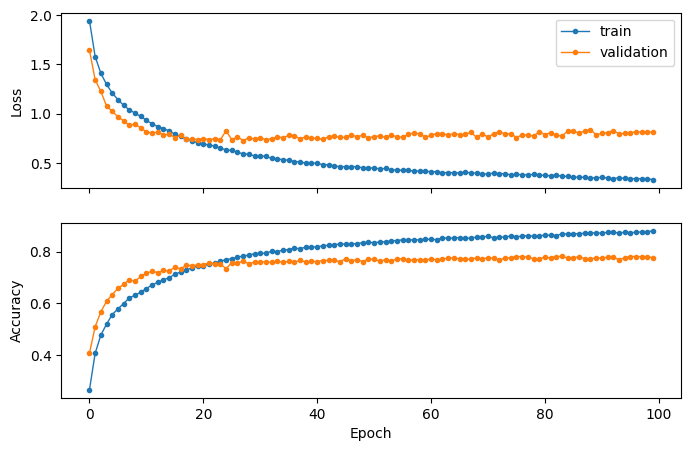

In [ ]:
_, axs = plt.subplots(2, 1, sharex=True, figsize=(8, 5))
axs[0].plot(history.history['loss'], marker='.', linewidth=1)
axs[0].plot(history.history['val_loss'], marker='.', linewidth=1)
axs[0].set_ylabel(r"Loss")
axs[1].plot(history.history['sparse_categorical_accuracy'], marker='.', linewidth=1)
axs[1].plot(history.history['val_sparse_categorical_accuracy'], marker='.', linewidth=1)
axs[1].set_ylabel(r"Accuracy")
axs[1].set_xlabel(r"Epoch")
axs[0].legend(["train", "validation"], loc="upper right")
plt.show()

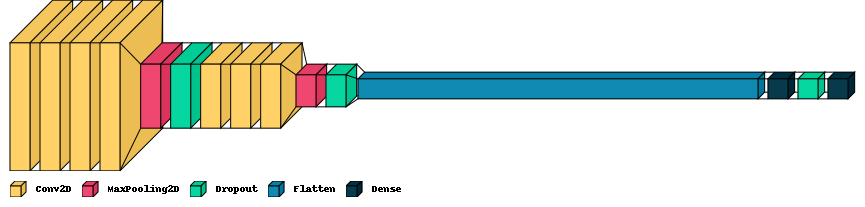

In [ ]:
visualkeras.layered_view(model, legend=True)

1/1 [==============================] - 0s 204ms/step


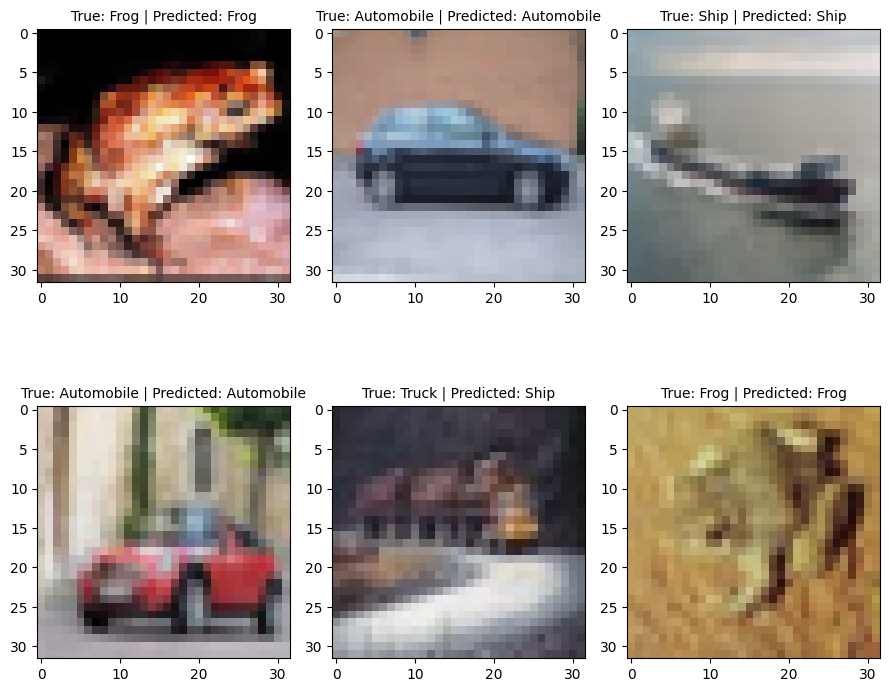

In [ ]:
#rows and columns  to see
num_row = 2
num_col = 3

#segment of the dataset
num = num_row*num_col
indexes = random.sample(range(x_test.shape[0]), k=num)
images = x_test[indexes]
labels = y_test[indexes]
predicted = [np.argmax(m) for m in model.predict(images)]

# plot
fig, axes = plt.subplots(num_row, num_col, figsize=(3*num_col,4*num_row))
for i in range(num_row*num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])
    ax.set_title(f'True: {category[labels[i][0]]} | Predicted: {category[predicted[i]]}', fontsize=10)
plt.tight_layout()
plt.show()